In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
class SVM_classifier:

    def __init__(self, learning_rate = 0.01, lambda_param = 0.01, n_iters = 1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_pred = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_pred[idx] * (np.dot(x_i, self.w) - self.b) < 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_pred[idx]))
                    self.b -= self.lr * y_pred[idx]
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


In [3]:
features, targets = make_blobs(n_samples = 500, n_features = 2, centers = 2, random_state = 42)
targets = np.where(targets == 0, -1, 1)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 43)

In [5]:
svc = SVM_classifier()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

In [6]:
accuracy_score(y_test, y_pred)

1.0

In [7]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

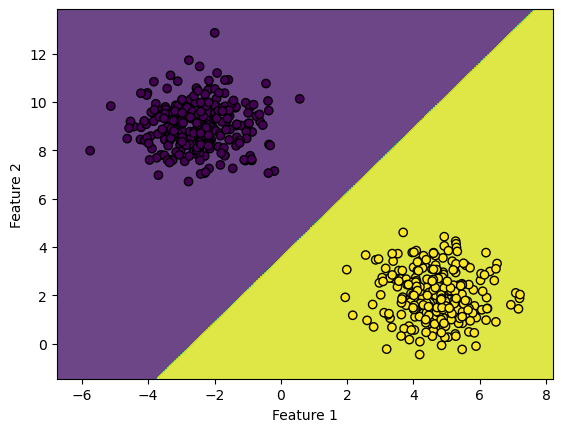

In [8]:
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.8)

plt.scatter(features[:, 0], features[:, 1], c = targets, edgecolor = 'black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()